In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle


from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from numpy.random import multivariate_normal
from sklearn.mixture import GaussianMixture

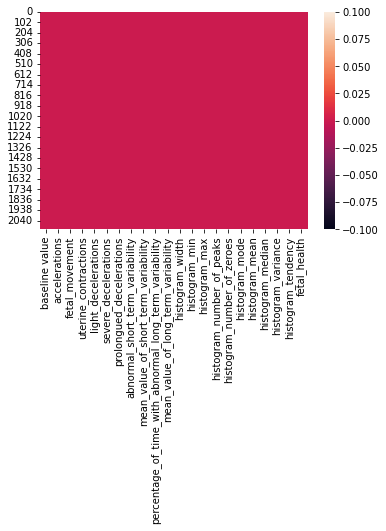

In [ ]:
df = pd.read_csv('fetal_health.csv')
sns.heatmap(df.isna())
plt.show()

In [ ]:
df = df.dropna()

In [ ]:
feature_columns = df.columns.values.tolist()[:-2] #the last column is the feature to predict
X = df[feature_columns]
pca = PCA(n_components=2).fit(X)
X_pca= pca.transform(X)
X_tsne = TSNE(n_components=2).fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
X_pca[:5], X_tsne[:5]

(array([[ 20.93516964,  44.6418966 ],
        [ 61.82073455, -30.33121472],
        [ 62.55829779, -29.13885493],
        [ 56.66367784, -10.10676763],
        [ 55.52466031, -11.08556081]]), array([[  2.6904898, -43.26686  ],
        [-32.555527 , -27.41782  ],
        [-32.565285 , -27.417896 ],
        [-16.734953 , -23.382172 ],
        [-16.839096 , -23.32423  ]], dtype=float32))

In [ ]:
labels_pca = {
            str(i): f"PC {i+1} ({var:.1f}%)" 
            for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels_tsne = {'0': 'TS 1', '1': 'TS 2'}
fig1 = px.scatter_matrix(X_pca, labels=labels_pca, dimensions=range(2), color=df['fetal_health'], title = 'PCA')
fig2 = px.scatter_matrix(X_tsne, labels=labels_tsne, dimensions=range(2), color=df['fetal_health'], title = 'TSNE')
fig1.show()
fig2.show()

In [ ]:
from skimage import data
my_image = data.astronaut()

In [ ]:
def color_quantization_k_means(image, n_colors):
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

    # Get labels for all points
    labels = kmeans.predict(image_array)



    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image
    
    # Display all results, alongside original image
    plt.figure(1)
    plt.clf()
    plt.axis('off')
    plt.title('Original image')
    plt.imshow(image)

    plt.figure(2)
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image ({n_colors} colors, K-Means)'  )
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
    

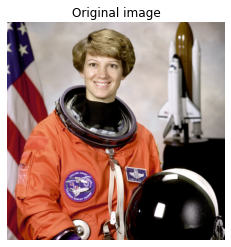

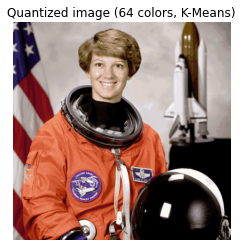

In [ ]:
color_quantization_k_means(my_image, n_colors=64)

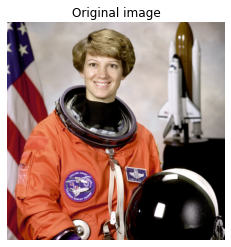

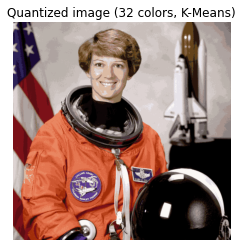

In [ ]:
color_quantization_k_means(my_image, n_colors=32)

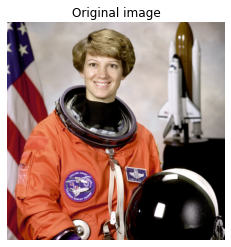

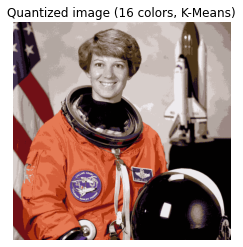

In [ ]:
color_quantization_k_means(my_image, n_colors=16)

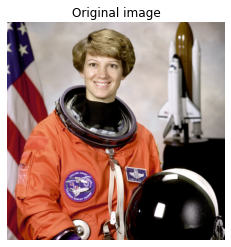

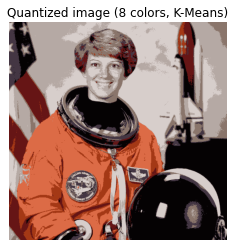

In [ ]:
color_quantization_k_means(my_image, n_colors=8)

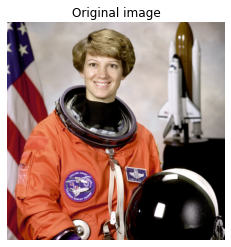

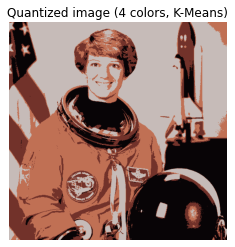

In [ ]:
color_quantization_k_means(my_image, n_colors=4)

In [ ]:
mean1 = (2, 3)
cov1 = [[1, 0], [0, 1]]
X1 = multivariate_normal(mean1, cov1, 200)

mean2 = (5, 6)
cov2 = [[2, 0], [0, 2]]
X2 = multivariate_normal(mean2, cov2, 200)
X = np.concatenate([X1, X2])

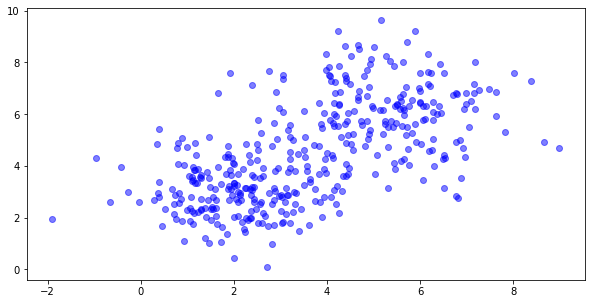

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, color = 'blue')
plt.show()

In [ ]:
clf = GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X)

GaussianMixture(n_components=2)

In [ ]:
clf.means_, clf.weights_, clf.covariances_

(array([[2.12833526, 3.06246408],
        [5.24903766, 6.0927594 ]]),
 array([0.52180918, 0.47819082]),
 array([[[ 1.28597909,  0.06278044],
         [ 0.06278044,  1.05902577]],
 
        [[ 1.7137164 , -0.12174695],
         [-0.12174695,  1.87211838]]]))

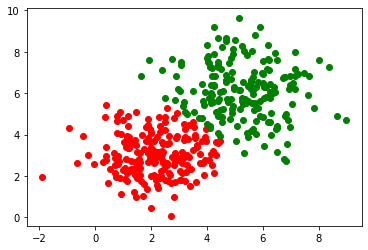

In [ ]:
predicted = clf.predict(X)
for k in range(0,2):
    data = X[predicted==k]
    plt.scatter(data[:,0],data[:,1],c=['red','green'][k])
plt.show()

In [4]:
import re
import string

from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [41]:
def clean_up (seq) :
  #switch to lower case
  seq = seq.lower()

  #remove abbreviations
  seq = re.sub(r"won\'t", "will not", seq)
  seq = re.sub(r"shan\'t", "shall not", seq)
  seq = re.sub(r"didn\'t", "did not", seq)
  seq = re.sub(r"doesn\'t", "does not", seq)
  seq = re.sub(r"can\'t", "can not", seq)
  seq = re.sub(r"don\'t", "do not", seq)
  seq = re.sub(r"wouldn\'t", "would not", seq)
  seq = re.sub(r"\'ve", " have", seq)
  seq = re.sub(r"\'m", " am", seq)
  seq = re.sub(r"\'d", " would", seq)
  seq = re.sub(r"\'re", " are", seq)
  
  #remove mentions
  seq = re.sub("@\S+", " ", seq)

  #remove urls
  seq = re.sub("https*\S+", " ", seq)

  #remove hashtags
  seq = re.sub("#\S+", " ", seq)

  #remove numbers
  seq = re.sub("\d", " ", seq)

  #remove punctuation symbols
  seq = re.sub('[%s]' % re.escape(string.punctuation), ' ', seq)

  #trim spaces
  seq = re.sub('\s{2,}', " ", seq)

  return seq 

In [42]:
file_neg = open('negative.txt')
neg_list = file_neg.read().split("absquatulation")
file_neg.close()

file_pos = open('positive.txt')
pos_list = file_pos.read().split("absquatulation")
file_pos.close()

for entry in neg_list :
  entry = clean_up(entry)

for entry in pos_list :
  entry = clean_up(entry)

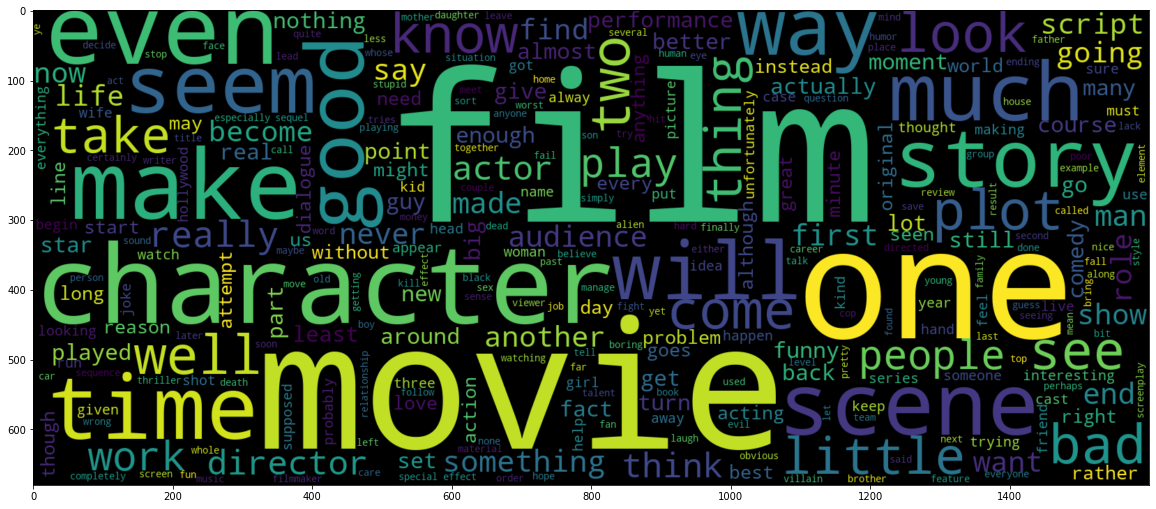

In [9]:
plt.figure(figsize = (20, 20)) 
wordcould = WordCloud(min_font_size = 3, max_words = 300, width = 1600, height = 680).generate(" ".join(neg_list))
plt.imshow(wordcould, interpolation = 'bilinear')
plt.grid(False)

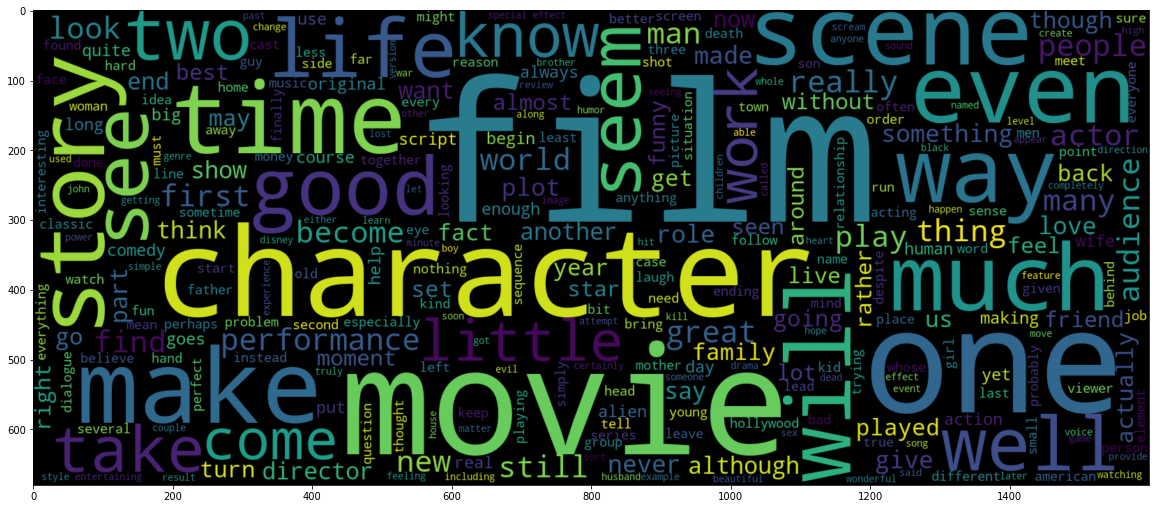

In [ ]:
plt.figure(figsize = (20, 20)) 
wordcould = WordCloud(min_font_size = 3, max_words = 300, width = 1600, height = 680).generate(" ".join(pos_list))
plt.imshow(wordcould, interpolation = 'bilinear')
plt.grid(False)

In [25]:
X = pos_list[:1000] + neg_list
#1 considered positive sentiment, 0 - negative
Y = (1000 * [1]) + (1000 * [0])

In [26]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.2)

vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf = vectorizer.fit(X_train)

X_train = tfidf.transform(X_train)
X_test = tfidf.transform(X_test)

In [28]:
classifier = RandomForestClassifier(n_estimators = 250, criterion = 'gini', max_features = 'sqrt').fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [29]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.89      0.82       194
           1       0.87      0.73      0.79       206

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.80       400
weighted avg       0.82      0.81      0.80       400



In [30]:
LDA = LatentDirichletAllocation(n_components = 2,
                                max_iter = 30,
                                n_jobs = 6,
                                learning_method = 'batch',
                                verbose = False)

count_vect = CountVectorizer(stop_words = 'english')

In [36]:
kjkj = [[],]
jkjk = [45, 77, 44, 55]
kjkj += jkjk
print(kjkj)

[[], 45, 77, 44, 55]


In [43]:
classes = [pos_list[:1000], neg_list]
tpcw = [[], []]

LDA.fit(count_vect.fit_transform(classes[0]))
tpcw[0] = [count_vect.get_feature_names()[i] for i in LDA.components_[0].argsort()[-15:]]
LDA.fit(count_vect.fit_transform(classes[1]))
tpcw[1] = [count_vect.get_feature_names()[i] for i in LDA.components_[0].argsort()[-15:]]

print(tpcw)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



[['characters', 'way', 'best', 'man', 'does', 'little', 'character', 'story', 'time', 'good', 'just', 'life', 'like', 'movie', 'film'], ['little', 'way', 'really', 'make', 'characters', 'story', 'plot', 'character', 'bad', 'time', 'good', 'just', 'like', 'movie', 'film']]


In [46]:
set(tpcw[0]).difference(set(tpcw[1])) #most frequent words that describe good movie

{'best', 'does', 'life', 'man'}

In [47]:
set(tpcw[1]).difference(set(tpcw[0])) #most frequent words that describe bad movie

{'bad', 'make', 'plot', 'really'}